In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.Загрузите данные в ноутбук

In [4]:
df_1 = pd.read_excel('Вариант 1.xlsx', header=None) 

In [5]:
df_1.columns = df_1.iloc[2]

In [6]:
df_1 = df_1.iloc[3:]

In [7]:
df_1.head()

2,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
3,1,117,11,М,341,1+++--1+-++---0---------0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,8,20,24
4,2,148,12А,М,338,1+---+0--+---+0----++-+-0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,8,20,24
5,3,152,13,Ж,104,2-----0--+----1---------1,0(1)0(3)0(1)0(3)0(2)0(2)0(3)1(3)0(2)1(2)1(1)1(1),NaN,9,22,24
6,4,152,13,М,104,1+--+-0++-----2----++---0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,9,22,24
7,5,132,11,М,337,1++---0-+++---1----+----2,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,10,24,24


In [8]:
df_2 = pd.read_excel('Вариант 2.xlsx', header=None) 
print(df_2.iloc[0][0])
df_2.columns = df_2.iloc[2]
df_2 = df_2.iloc[3:]

df_3 = pd.read_excel('Вариант 3.xlsx', header=None) 
print(df_3.iloc[0][0])
df_3.columns = df_3.iloc[2]
df_3 = df_3.iloc[3:]

df_4 = pd.read_excel('Вариант 4.xlsx', header=None) 
print(df_4.iloc[0][0])
df_4.columns = df_4.iloc[2]
df_4 = df_4.iloc[3:]

02-Математика профильная
03-Физика
05-Информатика и ИКТ


### 2.Сделайте описательную статистику по набранному баллу

In [9]:
sub = ['Русский язык','Математика','Физика','Информатика и ИКТ']
sub_df = [df_1,df_2,df_3,df_4]

In [13]:
for s in range(len(sub)):
    print('Описательная статистика по предмету',sub[s], '\n',  sub_df[s]['Балл'].astype(int).describe())

Описательная статистика по предмету Русский язык 
 count    3049.000000
mean       72.768777
std        13.662673
min        20.000000
25%        64.000000
50%        72.000000
75%        82.000000
max       100.000000
Name: Балл, dtype: float64
Описательная статистика по предмету Математика 
 count    2357.000000
mean       49.254985
std        17.876626
min         5.000000
25%        33.000000
50%        50.000000
75%        68.000000
max        96.000000
Name: Балл, dtype: float64
Описательная статистика по предмету Физика 
 count    1181.000000
mean       52.047417
std        14.959135
min        10.000000
25%        41.000000
50%        49.000000
75%        60.000000
max       100.000000
Name: Балл, dtype: float64
Описательная статистика по предмету Информатика и ИКТ 
 count    142.000000
mean      60.774648
std       19.350956
min        0.000000
25%       50.000000
50%       63.000000
75%       75.000000
max      100.000000
Name: Балл, dtype: float64


###  3.Найдите процент учащихся, выполнивших работу ниже среднего

In [16]:
for s in range(len(sub)):
    col = (sub_df[s]['Балл'] < sub_df[s]['Балл'].mean()).sum()
    print('Процент учащихся, выполнивших работу ниже среднего по предмету',sub[s], '\n',  str(round(col/sub_df[s]['Балл'].count()*100,2) ) + '%')

Процент учащихся, выполнивших работу ниже среднего по предмету Русский язык 
 51.26%
Процент учащихся, выполнивших работу ниже среднего по предмету Математика 
 47.98%
Процент учащихся, выполнивших работу ниже среднего по предмету Физика 
 56.22%
Процент учащихся, выполнивших работу ниже среднего по предмету Информатика и ИКТ 
 45.77%


### 4.Найти процент учащихся не сдавших экзамен

In [17]:
for s in range(len(sub)):
    print('Процент учащихся, не сдавших экзамен по предмету',
          sub[s], '\n',  
          str(round((sub_df[s]['Балл'] < sub_df[s]['Минимальный балл']).sum()/sub_df[s]['Балл'].count()*100,2) ) + '%')

Процент учащихся, не сдавших экзамен по предмету Русский язык 
 0.13%
Процент учащихся, не сдавших экзамен по предмету Математика 
 9.21%
Процент учащихся, не сдавших экзамен по предмету Физика 
 7.71%
Процент учащихся, не сдавших экзамен по предмету Информатика и ИКТ 
 11.27%


### 5.Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен

In [18]:
def exam(df):
    return (df['Балл'] >= df['Минимальный балл']).sum(),(df['Балл'] < df['Минимальный балл']).sum()

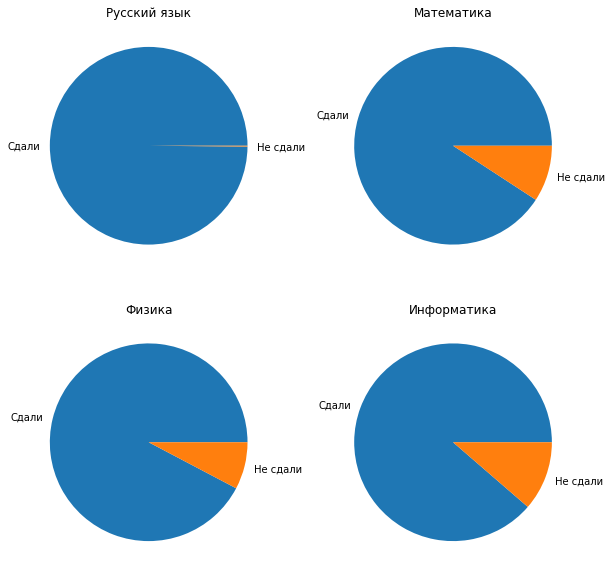

In [19]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
ax[0,0].set_title('Русский язык')
ax[0,1].set_title('Математика')
ax[1,0].set_title('Физика')
ax[1,1].set_title('Информатика')



ax[0,0].pie(exam(df_1),labels = ['Сдали','Не сдали'])
ax[0,1].pie(exam(df_2),labels = ['Сдали','Не сдали'])
ax[1,0].pie(exam(df_3),labels = ['Сдали','Не сдали'])
ax[1,1].pie(exam(df_4),labels = ['Сдали','Не сдали'])


plt.show()

### 6.Постройте ядерную оценку плотности распределению баллов за экзамен

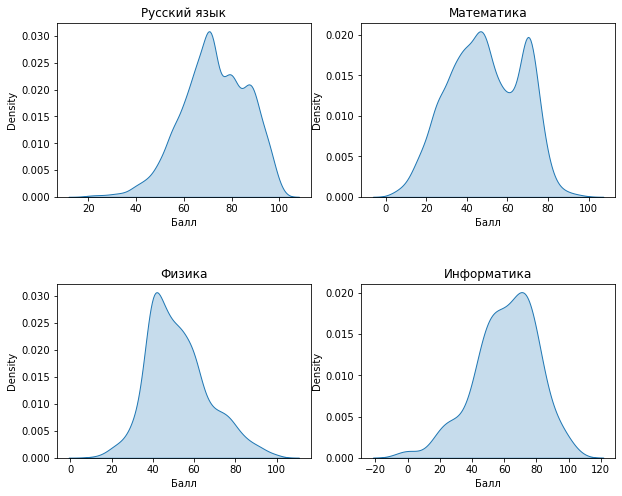

In [24]:
fig, ax = plt.subplots(2,2, figsize=(10,8))
plt.subplots_adjust(hspace=0.5)

ax[0,0].set_title('Русский язык')
ax[0,1].set_title('Математика')
ax[1,0].set_title('Физика')
ax[1,1].set_title('Информатика')



sns.kdeplot(ax=ax[0, 0], data=df_1['Балл'], shade=True)
sns.kdeplot(ax=ax[0, 1], data=df_2['Балл'], shade=True)
sns.kdeplot(ax=ax[1, 0], data=df_3['Балл'], shade=True)
sns.kdeplot(ax=ax[1, 1], data=df_4['Балл'], shade=True)

plt.show()

### 7.Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно».

In [28]:
sub

['Русский язык', 'Математика', 'Физика', 'Информатика и ИКТ']

In [29]:
borders = {'Русский язык':[35,58,72],
         'Математика':[27,47,65],
         'Физика':[36,54,68],
         'Информатика и ИКТ':[40,57,73]}

In [30]:
def marks(x, i):
    if x >= borders[sub[i]][0] and x<borders[sub[i]][1]:
        return 'удовлетворительно'
    elif x >= borders[sub[i]][1] and x<borders[sub[i]][2]:
        return 'хорошо'
    elif x >= borders[sub[i]][2]:
        return 'отлично'
    else:
        return 'неудовлетворительно'

In [32]:
for s in range(len(sub)):
    print('Процентное соотношение по предмету',sub[s], '\n',  round(sub_df[s]['Балл'].apply(lambda x:marks(x, s)).value_counts(normalize=True)*100,2))

Процентное соотношение по предмету Русский язык 
 отлично                53.33
хорошо                 32.63
удовлетворительно      13.35
неудовлетворительно     0.69
Name: Балл, dtype: float64
Процентное соотношение по предмету Математика 
 удовлетворительно      38.78
хорошо                 26.43
отлично                25.58
неудовлетворительно     9.21
Name: Балл, dtype: float64
Процентное соотношение по предмету Физика 
 удовлетворительно      51.48
хорошо                 24.89
отлично                15.92
неудовлетворительно     7.71
Name: Балл, dtype: float64
Процентное соотношение по предмету Информатика и ИКТ 
 хорошо                 32.39
отлично                30.28
удовлетворительно      26.06
неудовлетворительно    11.27
Name: Балл, dtype: float64


### 8.Какое процентное соотношение юношей и девушек писало данный экзамен?

In [33]:
for s in range(len(sub)):
    print('Процентное соотношение юношей и девушек по предмету',sub[s], '\n',  round(sub_df[s]['Пол'].*100value_counts(normalize=True),2))

Процентное соотношение юношей и девушек по предмету Русский язык 
 Ж    57.97
М    42.03
Name: Пол, dtype: float64
Процентное соотношение юношей и девушек по предмету Математика 
 Ж    52.84
М    47.16
Name: Пол, dtype: float64
Процентное соотношение юношей и девушек по предмету Физика 
 М    68.64
Ж    31.36
Name: Пол, dtype: float64
Процентное соотношение юношей и девушек по предмету Информатика и ИКТ 
 М    77.3
Ж    22.7
Name: Пол, dtype: float64


### 9.Сколько школ принимало участие в экзамене?

In [36]:
for s in range(len(sub)):
    print('Количество школ, принимавших участие по предмету',sub[s], '\n',  sub_df[s]['№ школы'].dropna().unique().shape[0])

Количество школ, принимавших участие по предмету Русский язык 
 24
Количество школ, принимавших участие по предмету Математика 
 17
Количество школ, принимавших участие по предмету Физика 
 19
Количество школ, принимавших участие по предмету Информатика и ИКТ 
 10
